### Topics covered:

• Linear Interpolation 
• Trimmed Mean
• Demonstrate The Central Limit Theorem
• Pearsons Correlation Coefficient
• Probability Mass Functions
• T-Tests
• Variance And Standard Deviation
• Hypothesis Testing
• Shapiro-Wilk Test
• Multiple Coin Tosses : Then Fair aur Biased Coin?


### Linear Interpolation




In [ ]:
x1 = input('x1 =')
x2 = input('x2 =')
y1 = input('y1 =')
y2 = input('y2 =')

In [41]:
x1 = int(x1)
x2 = int(x2)
y1 = int(y1)
y2 = int(y2)

In [42]:

ip_var = input('Enter the variable to be interpolated: ')                                       ##Point at which we want to interpolate
if(ip_var) == 'x':
    y= input('y = ')
    y = int(y)
else:
    x = input('x = ')
    x = int(x)



Enter the variable to be interpolated: y
x = 5


In [43]:
def interpolate(var , num):
    if(var=='y'):
        y = ((y2 - y1)/(x2-x1))*(num-x1)
        return y
    elif(var=='x'):
        x = ((x2-x1)/(y2-y1))*num + x1
        return x
    
    

In [44]:
interpolate('y',x)

50.0

### Trimmed Mean:

In [45]:
import pandas as pd
from scipy import stats

In [48]:
data = { 'name': ['a','b','c','d','e'] ,
           'val' : [1,2,3,90,110]}

In [50]:
df = pd.DataFrame(data)

In [52]:
##Non trimmed mean
df['val'].mean()

41.2

In [53]:
# Trim off the 20% most extreme scores (lowest and highest)
stats.trim_mean(df['val'], proportiontocut=0.2)

31.666666666666668

In [54]:
# Trim off the 20% most extreme scores and view the non-trimmed values
stats.trimboth(df['val'], proportiontocut=0.2)

array([ 2,  3, 90], dtype=int64)

In [55]:
# Trim off the highest 20% of values and view trimmed mean
stats.trim1(df['val'], proportiontocut=0.2, tail='right').mean()

24.0

In [56]:
# Trim off the highest 20% of values and view non-trimmed values
stats.trim1(df['val'], proportiontocut=0.2, tail='right')

array([ 1,  2,  3, 90], dtype=int64)


### Var and Standard_Deviation

When we calculate sample variance, we are attempting to estimate the population variance, an unknown value. To make this estimate, we estimate this unknown population variance from the mean of the squared deviations of samples from the overall sample mean. A negative sideffect of this estimation technique is that, because we are taking a sample, we are a more likely to observe observations with a smaller deviation because they are more common (e.g. they are the center of the distribution). The means that by definiton we will underestimate the population variance.

In [58]:
import math

In [59]:
data = [1,2,3,4,8,5,6,3,7,4,1,2,3,6,9,4,1,2]

In [63]:
n = len(data)
pop_mean = sum(data) / n
sample_mean = sum(data) / (n-1)

In [66]:
all_sq_dev_from_mean = []
for i in data:
    dev_from_mean = ( i - pop_mean)

sq_dev_from_mean = (dev_from_mean)**2
all_sq_dev_from_mean.append(sq_dev_from_mean)
sum_sq_dev_from_mean = sum(all_sq_dev_from_mean)

pop_var = sum_sq_dev_from_mean/n
sample_var = sum_sq_dev_from_mean/(n-1)

In [68]:
pop_var , sample_var

(0.21004801097393694, 0.222403776325345)

### Demonstrate Central Limit Theorem

According to Central Limit Theorem, for sufficiently large samples with size greater than 30, the shape of the sampling distribution will become more and more like a normal distribution, irrespective of the shape of the parent population.

#### The significance of the central limit theorem lies in the fact that it permits us to use sample statistics to make inferences about population parameters without knowing anything about the shape of the frequency distribution of that population other than what we can get from the sample.

In [71]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
# Create an empty dataframe
population = pd.DataFrame()

# Create an column that is 10000 random numbers drawn from a uniform distribution
population['numbers'] = np.random.uniform(0,10000,size=10000)

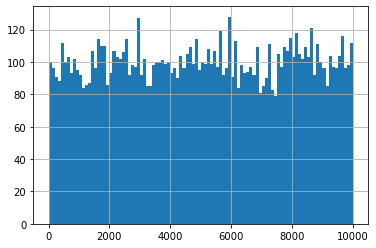

In [78]:
# Plot a histogram of the score data.
# This confirms the data is not a normal distribution.
population['numbers'].hist(bins=100)

In [79]:
# View the mean of the numbers
population['numbers'].mean()

5037.751423478291

In [85]:
# Create a list
sampled_means = []

# For 1000  times,
for i in range(0,2000):
    # Take a random sample of 100 rows from the population, take the mean of those rows, append to sampled_means
    sampled_means.append(population.sample(n=50).mean().values[0])

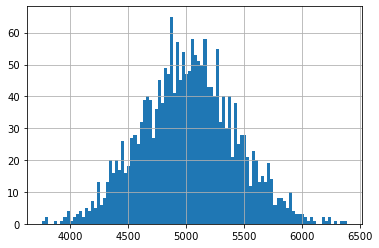

In [86]:
# Plot a histogram of sampled_means. 
# It is clearly normally distributed and centered around 5000
pd.Series(sampled_means).hist(bins=100)

This is the critical chart, remember that the population distribution was uniform, however, this distribution is approaching normality. This is the key point to the central limit theory, and the reason we can assume sample means are not bias.

In [87]:
# View the mean of the sampled_means
pd.Series(sampled_means).mean()

5021.25636239397

In [88]:
# Subtract Mean Sample Mean From True Population Mean
error = population['numbers'].mean() - pd.Series(sampled_means).mean()

# Print
print('The Mean Sample Mean is only %f different the True Population mean!' % error)

The Mean Sample Mean is only 16.495061 different the True Population mean!


### Pearson's Correlation Coeff

a statistic measuring the linear interdependence between two variables or two sets of data.

In [94]:
import statistics as stats

In [102]:
x = [1,2,3,4,5,6,7,8,9]
y = [2,1,2,4.5,7,6.5,6,9,9.5]

In [110]:
def pearson(x,y):
    n = len(x)
    x_mean = stats.mean(x)
    y_mean = stats.mean(y)
    
    std_x = stats.stdev(x)
    std_y = stats.stdev(y)
    
    diff_x = []
    diff_y = []
    for i in x:
        diff_x.append((i - x_mean)/(std_x))
    for i in y:
        diff_y.append((i - y_mean)/(std_y))

    net_prod_sum = np.dot(diff_x , diff_y)

    return (net_prod_sum/(n-1))


In [111]:
pearson(x,y)

0.9412443251336238

### Probability Mass Func

In [114]:
# Create some random integer data
data = [3,2,3,4,2,3,5,2,2,3,3,5,2,2,5,6,2,2,2,3,6,6,2,4,3,2,3]

In [115]:
data = np.array(data)

In [130]:
uniq = np.unique(data)
i = 0

freq = []
while(i<(len(uniq))):
    count = 0
    for j in data:
        if(j==uniq[i]):
            count = count + 1
    freq.append(count)
    i = i+1
    

In [139]:
pmf = freq / np.sum(freq)

In [140]:
pmf

array([0.40740741, 0.2962963 , 0.07407407, 0.11111111, 0.11111111])

<BarContainer object of 5 artists>

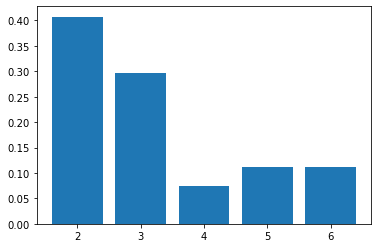

In [141]:
plt.bar(uniq , pmf)

### T-Test

A t-test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.

In [142]:
from scipy import stats

In [143]:
# Create a list of 20 observations drawn from a random distribution 
# with mean 1 and a standard deviation of 1.5
x = np.random.normal(1, 1.5, 20)

# Create a list of 20 observations drawn from a random distribution 
# with mean 0 and a standard deviation of 1.5
y = np.random.normal(0, 1.5, 20)

In [144]:
##One Sample Two-Sided T-Test

In [145]:
# Run a t-test to test if the mean of x is statistically significantly different than 0
pvalue = stats.ttest_1samp(x, 0)[1]

# View the p-value
pvalue

0.09203905006422106

In [146]:
#Two Variable Unpaired Two-Sided T-Test With Equal Variances
stats.ttest_ind(x, y)[1]

0.06084728230503166

In [147]:
#Two Variable Unpaired Two-Sided T-Test With Unequal Variances
stats.ttest_ind(x, y, equal_var=False)[1]

0.06087443976797535

In [148]:
#Two Variable Paired Two-Sided T-Test

Paired T-tests are used when we are taking repeated samples and want to take into account the fact that the two distributions we are testing are paired.

In [149]:
stats.ttest_rel(x, y)[1]

0.05946128359222167

In [150]:
stats.ttest_rel(x,y)

Ttest_relResult(statistic=2.0046587768431157, pvalue=0.05946128359222167)

### Coin Toss
You toss a coin 30 times and see head 24 times. Is it a fair coin?

Hypothesis 1: Tossing a fair coin will get you 15 heads in 30 tosses. This coin is biased

Hypothesis 2: Come on, even a fair coin could show 24 heads in 30 tosses. This is just by chance

### Hacker's Approach
Simulation. Run the experiment 100,000 times. Find the percentage of times the experiment returned 24 or more heads. If it is more than 5%, we conclude that the coin is biased.

In [153]:
total_tosses = 30
num_heads = 24
prob_head = 0.5

#0 is tail. 1 is heads. Generate one experiment
experiment = np.random.randint(0,2,total_tosses)
print("Data of the Experiment:", experiment)
#Find the number of heads
print("Heads in the Experiment:", experiment[experiment==1])  #This will give all the heads in the array
head_count = experiment[experiment==1].shape[0] #This will get the count of heads in the array
print ("Number of heads in the experiment:", head_count)

Data of the Experiment: [0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1]
Heads in the Experiment: [1 1 1 1 1 1 1 1 1 1]
Number of heads in the experiment: 10


In [160]:
#Now, the above experiment needs to be repeated 100 times. Let's write a function and put the above code in a loop

def coin_toss_experiment(times_to_repeat):

    head_count = np.empty([times_to_repeat,1], dtype=int)
    
    for times in np.arange(times_to_repeat):
        experiment = np.random.randint(0,2,total_tosses)
        head_count[times] = experiment[experiment==1].shape[0]
    

    return head_count

In [162]:
head_count = coin_toss_experiment(100)

In [163]:
head_count[:10]

array([[15],
       [14],
       [18],
       [14],
       [ 9],
       [14],
       [12],
       [12],
       [13],
       [16]])

In [164]:
head_count.shape

(100, 1)

In [165]:
import seaborn as sns
sns.set(color_codes = True)

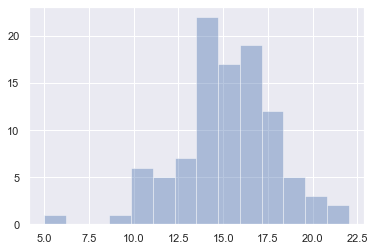

In [166]:
sns.distplot(head_count, kde=False)

In [167]:
#Number of times the experiment returned 24 heads.
head_count[head_count>=24]

array([], dtype=int32)

In [171]:

print("No of times experiment returned 24 heads or more:", head_count[head_count>=24].shape[0])
print ("% of times with 24 or more heads: ", head_count[head_count>=24].shape[0]/float(head_count.shape[0])*100)

No of times experiment returned 24 heads or more: 0
% of times with 24 or more heads:  0.0


In [169]:
###Now repeating same experiment 10,000 times:
head_count_2 = coin_toss_experiment(10000)

In [170]:
head_count_2[head_count_2>=24]

array([24, 24, 24, 25, 24, 25, 24, 24])

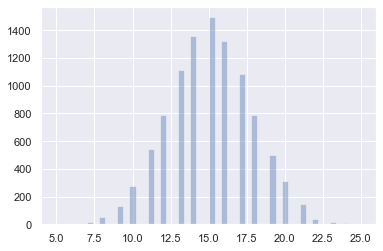

In [173]:
sns.distplot(head_count_2, kde=False)

In [172]:

print("No of times experiment returned 24 heads or more:", head_count_2[head_count_2>=24].shape[0])
print ("% of times with 24 or more heads: ", head_count_2[head_count_2>=24].shape[0]/float(head_count_2.shape[0])*100)

No of times experiment returned 24 heads or more: 8
% of times with 24 or more heads:  0.08


In [174]:
###0.08% is much less than 5% so coin is not biased

### Problem
The number of shoes sold by an e-commerce company during the first three months(12 weeks) of the year were:
23 21 19 24 35 17 18 24 33 27 21 23

Meanwhile, the company developed some dynamic price optimization algorithms and the sales for the next 12 weeks were:
31 28 19 24 32 27 16 41 23 32 29 33

Did the dynamic price optimization algorithm deliver superior results? Can it be trusted?

### Solution
Before we get onto different approaches, let's quickly get a feel for the data

In [175]:
#Load the data
before_opt = np.array([23, 21, 19, 24, 35, 17, 18, 24, 33, 27, 21, 23])
after_opt = np.array([31, 28, 19, 24, 32, 27, 16, 41, 23, 32, 29, 33])

In [176]:
before_opt.mean()

23.75

In [177]:
after_opt.mean()

27.916666666666668

In [178]:
##Difference:
observed_difference = after_opt.mean() - before_opt.mean()

In [179]:
print( "Difference between the means is:", observed_difference)

Difference between the means is: 4.166666666666668


On average, the sales after optimization is more than the sales before optimization. But is the difference legit? Could it be due to chance?

### Classical Method :
We could cover this method later on. This entails doing a t-test

### Hacker's Method : 
Let's see if we can provide a hacker's perspective to this problem, similar to what we did in the previous problem.

In [180]:

shoe_sales = np.array([np.append(np.zeros(before_opt.shape[0]), np.ones(after_opt.shape[0])),
np.append(before_opt, after_opt)], dtype=int)

In [181]:
print ("Shape:", shoe_sales.shape)
print ("Data:", "\n", shoe_sales)

Shape: (2, 24)
Data: 
 [[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1]
 [23 21 19 24 35 17 18 24 33 27 21 23 31 28 19 24 32 27 16 41 23 32 29 33]]


In [182]:
shoe_sales = shoe_sales.T
print("Shape:",shoe_sales.shape)
print ("Data:", "\n", shoe_sales)

Shape: (24, 2)
Data: 
 [[ 0 23]
 [ 0 21]
 [ 0 19]
 [ 0 24]
 [ 0 35]
 [ 0 17]
 [ 0 18]
 [ 0 24]
 [ 0 33]
 [ 0 27]
 [ 0 21]
 [ 0 23]
 [ 1 31]
 [ 1 28]
 [ 1 19]
 [ 1 24]
 [ 1 32]
 [ 1 27]
 [ 1 16]
 [ 1 41]
 [ 1 23]
 [ 1 32]
 [ 1 29]
 [ 1 33]]


In [183]:
#This is the approach we are going to take
#We are going to randomly shuffle the labels. Then compute the mean between the two groups. 
#Find the % of times when the difference between the means computed is greater than what we observed above
#If the % of times is less than 5%, we would make the call that the improvements are real

In [184]:
np.random.shuffle(shoe_sales)

In [185]:
shoe_sales

array([[ 0, 27],
       [ 1, 41],
       [ 1, 33],
       [ 0, 24],
       [ 1, 24],
       [ 0, 33],
       [ 0, 35],
       [ 1, 19],
       [ 1, 31],
       [ 0, 19],
       [ 0, 24],
       [ 0, 23],
       [ 1, 29],
       [ 1, 23],
       [ 1, 16],
       [ 0, 21],
       [ 0, 18],
       [ 1, 32],
       [ 0, 23],
       [ 0, 21],
       [ 1, 28],
       [ 0, 17],
       [ 1, 32],
       [ 1, 27]])

In [186]:
experiment_label = np.random.randint(0,2,shoe_sales.shape[0])

In [187]:
experiment_label

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1])

In [189]:
experiment_data = np.array([experiment_label, shoe_sales[:,1]])
experiment_data = experiment_data.T
print (experiment_data)



[[ 0 27]
 [ 0 41]
 [ 1 33]
 [ 0 24]
 [ 1 24]
 [ 1 33]
 [ 1 35]
 [ 0 19]
 [ 0 31]
 [ 1 19]
 [ 0 24]
 [ 0 23]
 [ 1 29]
 [ 1 23]
 [ 1 16]
 [ 1 21]
 [ 0 18]
 [ 0 32]
 [ 0 23]
 [ 1 21]
 [ 0 28]
 [ 0 17]
 [ 1 32]
 [ 1 27]]


In [190]:
experiment_diff_mean =  experiment_data[experiment_data[:,0]==1].mean() \
                        - experiment_data[experiment_data[:,0]==0].mean()

In [191]:
experiment_diff_mean

0.75

In [192]:
#Like the previous prob, let's repeat this experiment 100 and then 100000 times

In [193]:
def shuffle_experiment(number_of_times):
    experiment_diff_mean = np.empty([number_of_times,1])
    for times in np.arange(number_of_times):
        experiment_label = np.random.randint(0,2,shoe_sales.shape[0])
        experiment_data = np.array([experiment_label, shoe_sales[:,1]]).T
        experiment_diff_mean[times] =  experiment_data[experiment_data[:,0]==1].mean() \
                        - experiment_data[experiment_data[:,0]==0].mean()
    return experiment_diff_mean

In [194]:
experiment_diff_mean = shuffle_experiment(100)

In [195]:
experiment_diff_mean[:10]

array([[ 0.81111111],
       [ 1.25555556],
       [ 0.31818182],
       [ 0.47142857],
       [-2.        ],
       [ 1.81428571],
       [-1.08041958],
       [ 1.46875   ],
       [ 0.06643357],
       [-0.64285714]])

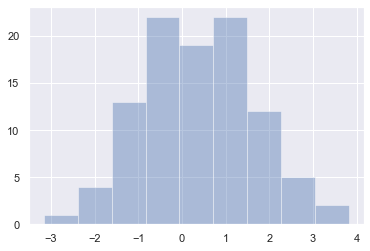

In [196]:
sns.distplot(experiment_diff_mean, kde=False)

In [197]:
#Finding % of times difference of means is greater than observed
print("Data: Difference in mean greater than observed:", \
        experiment_diff_mean[experiment_diff_mean>=observed_difference])

print ("Number of times diff in mean greater than observed:", \
            experiment_diff_mean[experiment_diff_mean>=observed_difference].shape[0])
print("% of times diff in mean greater than observed:", \
        experiment_diff_mean[experiment_diff_mean>=observed_difference].shape[0]/float(experiment_diff_mean.shape[0])*100)

Data: Difference in mean greater than observed: []
Number of times diff in mean greater than observed: 0
% of times diff in mean greater than observed: 0.0


In [199]:
experiment_diff_mean_2 = shuffle_experiment(10000)

In [200]:
#Finding % of times difference of means is greater than observed
print("Data: Difference in mean greater than observed:", \
        experiment_diff_mean_2[experiment_diff_mean_2>=observed_difference])

print ("Number of times diff in mean greater than observed:", \
            experiment_diff_mean_2[experiment_diff_mean_2>=observed_difference].shape[0])
print("% of times diff in mean greater than observed:", \
        experiment_diff_mean_2[experiment_diff_mean_2>=observed_difference].shape[0]/float(experiment_diff_mean_2.shape[0])*100)

Data: Difference in mean greater than observed: [4.25       4.5625     4.46875    4.16666667 4.66666667 4.24285714
 4.54195804 4.55042017 4.27777778 4.375      4.3487395  4.21428571
 4.29020979 4.41666667 4.85294118 4.27777778 4.3487395  4.18888889
 4.63333333 4.3        4.54444444 4.17832168 4.21875    4.45555556]
Number of times diff in mean greater than observed: 24
% of times diff in mean greater than observed: 0.24


In [ ]:
###It means increase in sales was just by chance

Now, to show that the same difference in mean might lead to a different conclusion, let's try the same experiment with a different dataset.

In [213]:

before_opt = np.array([230, 210, 190, 240, 350, 170, 180, 240, 330, 270, 210, 230])
after_opt = np.array([310, 180, 190, 240, 220, 240, 160, 410, 130, 320, 290, 210])

In [214]:
print("Mean sales before price optimization:", np.mean(before_opt))
print ("Mean sales after price optimization:", np.mean(after_opt))
print ("Difference in mean sales:", np.mean(after_opt) - np.mean(before_opt)) #Same as above

Mean sales before price optimization: 237.5
Mean sales after price optimization: 241.66666666666666
Difference in mean sales: 4.166666666666657


In [215]:
shoe_sales = np.array([np.append(np.zeros(before_opt.shape[0]), np.ones(after_opt.shape[0])),
np.append(before_opt, after_opt)], dtype=int)
shoe_sales = shoe_sales.T

In [216]:
shoe_sales


array([[  0, 230],
       [  0, 210],
       [  0, 190],
       [  0, 240],
       [  0, 350],
       [  0, 170],
       [  0, 180],
       [  0, 240],
       [  0, 330],
       [  0, 270],
       [  0, 210],
       [  0, 230],
       [  1, 310],
       [  1, 180],
       [  1, 190],
       [  1, 240],
       [  1, 220],
       [  1, 240],
       [  1, 160],
       [  1, 410],
       [  1, 130],
       [  1, 320],
       [  1, 290],
       [  1, 210]])

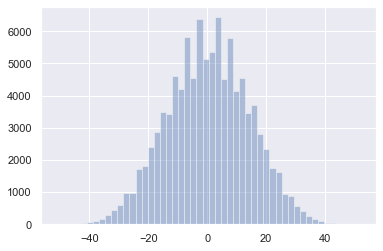

In [217]:
experiment_diff_mean = shuffle_experiment(100000)
sns.distplot(experiment_diff_mean, kde=False)

In [218]:
#Finding % of times difference of means is greater than observed
print("Number of times diff in mean greater than observed:", \
            experiment_diff_mean[experiment_diff_mean>=observed_difference].shape[0])
print ("% of times diff in mean greater than observed:", \
        experiment_diff_mean[experiment_diff_mean>=observed_difference].shape[0]/float(experiment_diff_mean.shape[0])*100)

Number of times diff in mean greater than observed: 40256
% of times diff in mean greater than observed: 40.256


In [219]:
###Conclusion has changed now that is price optimization is effect in this case..But what is the average rise in sales in both the
##cases...i.e even though price optimization has an effect in second case is it worth it??

In the first case, how much did the price optimization increase the sales on average?

In [221]:
before_opt = np.array([23, 21, 19, 24, 35, 17, 18, 24, 33, 27, 21, 23])
after_opt = np.array([31, 28, 19, 24, 32, 27, 16, 41, 23, 32, 29, 33])

print("The % increase of sales in the first case:", \
(np.mean(after_opt) - np.mean(before_opt))/np.mean(before_opt)*100,"%")

The % increase of sales in the first case: 17.543859649122812 %


In [222]:

before_opt = np.array([230, 210, 190, 240, 350, 170, 180, 240, 330, 270, 210, 230])
after_opt = np.array([310, 180, 190, 240, 220, 240, 160, 410, 130, 320, 290, 210])

print("The % increase of sales in the second case:", \
(np.mean(after_opt) - np.mean(before_opt))/np.mean(before_opt)*100,"%")

The % increase of sales in the second case: 1.7543859649122768 %


#### Would business feel comfortable spending millions of dollars if the increase is going to be just 1.75%. Does it make sense? Maybe yes - if margins are thin and any increase is considered good. But if the returns from the price optimization module does not let the company break even, it makes no sense to take that path.

### How large is the effect?
To answer such a question, we will make use of the concept confidence interval

In plain english, confidence interval is the range of values the measurement metric is going to take.

An example would be: 90% of the times, the increase in average sales (before and after price optimization) would be within the bucket 3.4 and 6.7 (These numbers are illustrative. We will derive those numbers below)

#### What is the hacker's way of doing it? We will do the following steps:

From actual sales data, we sample the data with repetition (separately for before and after) - sample size will be the same as the original

Find the differences between the mean of the two samples.

Repeat steps 1 and 2 , say 100,000 times.

Sort the differences. For getting 90% interval, take the 5% and 95% number. That range gives you the 90% confidence interval on the mean.

This process of generating the samples is called bootstrapping

In [223]:
#Load the data
before_opt = np.array([23, 21, 19, 24, 35, 17, 18, 24, 33, 27, 21, 23])
after_opt = np.array([31, 28, 19, 24, 32, 27, 16, 41, 23, 32, 29, 33])

In [236]:
before_opt = np.array([230, 210, 190, 240, 350, 170, 180, 240, 330, 270, 210, 230])
after_opt = np.array([310, 180, 190, 240, 220, 240, 160, 410, 130, 320, 290, 210])

In [237]:
#generate a uniform random sample
random_before_opt = np.random.choice(before_opt, size=before_opt.size, replace=True)

In [238]:

print("Actual sample before optimization:", before_opt)
print("Bootstrapped sample before optimization: ", random_before_opt)

Actual sample before optimization: [230 210 190 240 350 170 180 240 330 270 210 230]
Bootstrapped sample before optimization:  [190 330 270 270 210 180 330 170 270 230 330 190]


In [239]:

print("Mean for actual sample:", np.mean(before_opt))
print("Mean for bootstrapped sample:", np.mean(random_before_opt))

Mean for actual sample: 237.5
Mean for bootstrapped sample: 247.5


In [240]:
random_after_opt = np.random.choice(after_opt, size=after_opt.size, replace=True)
print("Actual sample after optimization:", after_opt)
print("Bootstrapped sample after optimization: ", random_after_opt)
print ("Mean for actual sample:", np.mean(after_opt))
print ("Mean for bootstrapped sample:", np.mean(random_after_opt))

Actual sample after optimization: [310 180 190 240 220 240 160 410 130 320 290 210]
Bootstrapped sample after optimization:  [130 160 130 210 190 240 130 160 180 180 180 290]
Mean for actual sample: 241.66666666666666
Mean for bootstrapped sample: 181.66666666666666


In [241]:
print ("Difference in means of actual samples:", np.mean(after_opt) - np.mean(before_opt))
print ("Difference in means of bootstrapped samples:", np.mean(random_after_opt) - np.mean(random_before_opt))

Difference in means of actual samples: 4.166666666666657
Difference in means of bootstrapped samples: -65.83333333333334


In [242]:
#Like always, we will repeat this experiment 100,000 times. 

def bootstrap_experiment(number_of_times):
    mean_difference = np.empty([number_of_times,1])
    for times in np.arange(number_of_times):
        random_before_opt = np.random.choice(before_opt, size=before_opt.size, replace=True)
        random_after_opt = np.random.choice(after_opt, size=after_opt.size, replace=True)
        mean_difference[times] = np.mean(random_after_opt) - np.mean(random_before_opt)
    return mean_difference

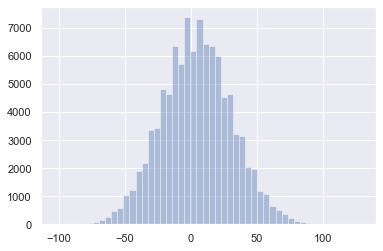

In [243]:

mean_difference = bootstrap_experiment(100000)
sns.distplot(mean_difference, kde=False)

In [244]:
mean_difference = np.sort(mean_difference, axis=0)

In [245]:
mean_difference #Sorted difference

array([[-101.66666667],
       [ -99.16666667],
       [ -99.16666667],
       ...,
       [ 112.5       ],
       [ 112.5       ],
       [ 128.33333333]])

In [246]:
np.percentile(mean_difference, [5,95])

array([-39.16666667,  48.33333333])

In [235]:
###90% of times the difference between avg sales after optim and before optim would lie in the above interval

## Hypothesis Testing
We would like to know if the effects we see in the sample(observed data) are likely to occur in the population.

The way classical hypothesis testing works is by conducting a statistical test to answer the following question:

#### Given the sample and an effect, what is the probability of seeing that effect just by chance?

Here are the steps on how we would do this

Compute test statistic

Define null hypothesis

Compute p-value

Interpret the result

If p-value is very low(most often than now, below 0.05), the effect is considered statistically significant. That means that effect is unlikely to have occured by chance. The inference? The effect is likely to be seen in the population too.

This process is very similar to the proof by contradiction paradigm. We first assume that the effect is false. That's the null hypothesis. Next step is to compute the probability of obtaining that effect (the p-value). If p-value is very low(<0.05 as a rule of thumb), we reject the null hypothesis.

In [248]:
weed_pd = pd.read_csv("Weed_Price.csv", parse_dates=[-1])

In [249]:
weed_pd["month"] = weed_pd.date.apply(lambda x: x.month)  ###Creating new columns of month and year
weed_pd["year"] = weed_pd.date.apply(lambda x: x.year)

In [250]:
weed_pd.head()


,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date,month,year
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01,1,2014
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01,1,2014
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01,1,2014
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01,1,2014
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01,1,2014


In [251]:
##Let's work on weed prices in California in 2014
weed_ca_2014 = weed_pd[(weed_pd.State=="California") & (weed_pd.year==2014)]

In [252]:
#Mean and standard deviation of high quality weed's price
print("Mean:", weed_ca_2014.HighQ.mean())
print( "Standard Deviation:", weed_ca_2014.HighQ.std())

Mean: 245.8942307692309
Standard Deviation: 1.289907939371412


In [253]:
#Confidence interval on the mean
stats.norm.interval(0.95, loc=weed_ca_2014.HighQ.mean(), scale = weed_ca_2014.HighQ.std()/np.sqrt(len(weed_ca_2014)))

(245.761718492726, 246.02674304573577)

#### Question: Are high-quality weed prices in Jan 2014 significantly higher than in Jan 2015?

In [254]:

#Get the data
weed_ca_jan2014 = np.array(weed_pd[(weed_pd.State=="California") & (weed_pd.year==2014) & (weed_pd.month==1)].HighQ)
weed_ca_jan2015 = np.array(weed_pd[(weed_pd.State=="California") & (weed_pd.year==2015) & (weed_pd.month==1)].HighQ)

In [255]:
print("Mean-2014 Jan:", weed_ca_jan2014.mean())
print ("Mean-2015 Jan:", weed_ca_jan2015.mean())

Mean-2014 Jan: 248.4454838709677
Mean-2015 Jan: 243.60225806451612


In [256]:
print("Effect size:", weed_ca_jan2014.mean() - weed_ca_jan2015.mean())

Effect size: 4.843225806451585


In [257]:
stats.ttest_ind(weed_ca_jan2014, weed_ca_jan2015, equal_var=True)

Ttest_indResult(statistic=98.01132523815805, pvalue=6.297971818508403e-68)

p-value is the probability that the effective size was by chance. And here, p-value is almost 0.

Conclusion: The price difference is significant. But is a price increase of $4.85 a big deal? The price decreased in 2015 by almost 2%. Always remember to look at effect size.

#### Assumption of t-test
One assumption is that the data used came from a normal distribution.
There's a Shapiro-Wilk test to test for normality. If p-value is less than 0.05, then there's a low chance that the distribution is normal.

In [258]:
stats.shapiro(weed_ca_jan2015)

ShapiroResult(statistic=0.9469053149223328, pvalue=0.12818680703639984)

In [259]:
stats.shapiro(weed_ca_jan2014)        ###P-val is greater than 0.05 so the data is from normally distributed population

ShapiroResult(statistic=0.9353488683700562, pvalue=0.06141229346394539)